### <b> Classification Models </b>

* The primary goal of the project was to focus on a TimeSeries approach in order to classify new entries of a given plant according to biometric and environmental features. However, due to a number of limited data points in the original dataset and a lack of frequent biometric measurements, I consider that a solid first approach would be to treat this problema as a Supervised Classification problem in order to predict the development stage, according to the BBCH scale, of a lettuce

* Using classic ML models will also help us establish a good baseline for prediction and error related metrics before trying some DL models

* Proposed Models: Decision Trees, Random Forests, Gradient Boosting or SVM

#### <b> TODO </b>
* Incluir ilustração/diagrama dos dados 
* Incluir descrição do problema 
* Separar CODE em várias colunas
* Normalização para todas as variáveis de entrada

* PCA para perceber as correlações vars. ambientais

* Variávies de ambiente passam a ser variáveis de acumulação

* Juntar Temp Mean + Hum Mean
* Prever: BBCH, Diâmetro, Prependicular, Height

* X -> Estado, contextos ambientais, 



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Splits
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
lettuce_df = pd.read_csv("../data/enc_biometric_data.csv")

In [3]:
lettuce_df

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,Max. Temp.,...,Mean. Temp.,Max. Hum.,Min. Hum.,Mean. Hum.,Combined Temperature Average,Combined Temperature Std Dev,Combined Humidity Average,Combined Humidity Std Dev,BBCH,Average Leaf Thickness
0,2024-09-07,1,1,1,39,10,14.5,10.4,9.50,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
1,2024-09-07,2,1,1,32,10,10.9,9.7,9.80,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
2,2024-09-07,3,1,1,40,13,15.8,13.9,9.40,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
3,2024-09-07,4,1,1,31,10,12.1,7.2,9.50,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
4,2024-09-07,5,1,1,37,11,14.2,10.5,12.50,28.500000,...,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,0,17,11,26.8,24.5,10.15,21.758629,...,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3250
356,2024-10-03,42,6,0,24,7,30.1,22.6,11.85,21.758629,...,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3200
357,2024-10-03,43,6,0,16,11,22.8,20.5,10.35,21.758629,...,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3650
358,2024-10-03,44,6,0,28,10,30.5,26.2,11.55,21.758629,...,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3500


##### <b> Separate "Date" column into Day, Month, Year columns </b>

In [4]:
lettuce_df["Date"] = pd.to_datetime(lettuce_df["Date"])

In [5]:
lettuce_df['Year'] = lettuce_df["Date"].dt.year
lettuce_df['Month'] = lettuce_df["Date"].dt.month
lettuce_df['Day'] = lettuce_df["Date"].dt.day

In [6]:
lettuce_df

,Date,Number,Line,Sample,CODE,No leaves,Diameter,Perpendicular,Height,Max. Temp.,...,Mean. Hum.,Combined Temperature Average,Combined Temperature Std Dev,Combined Humidity Average,Combined Humidity Std Dev,BBCH,Average Leaf Thickness,Year,Month,Day
0,2024-09-07,1,1,1,39,10,14.5,10.4,9.50,28.500000,...,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
1,2024-09-07,2,1,1,32,10,10.9,9.7,9.80,28.500000,...,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
2,2024-09-07,3,1,1,40,13,15.8,13.9,9.40,28.500000,...,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
3,2024-09-07,4,1,1,31,10,12.1,7.2,9.50,28.500000,...,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
4,2024-09-07,5,1,1,37,11,14.2,10.5,12.50,28.500000,...,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2024-10-03,41,6,0,17,11,26.8,24.5,10.15,21.758629,...,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3250,2024,10,3
356,2024-10-03,42,6,0,24,7,30.1,22.6,11.85,21.758629,...,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3200,2024,10,3
357,2024-10-03,43,6,0,16,11,22.8,20.5,10.35,21.758629,...,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3650,2024,10,3
358,2024-10-03,44,6,0,28,10,30.5,26.2,11.55,21.758629,...,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3500,2024,10,3


In [7]:
# Drop date column
lettuce_df.drop(columns=["Date", "Number", "Sample", "CODE", "Line"], inplace=True)

In [8]:
lettuce_df

,No leaves,Diameter,Perpendicular,Height,Max. Temp.,Min. Temp.,Mean. Temp.,Max. Hum.,Min. Hum.,Mean. Hum.,Combined Temperature Average,Combined Temperature Std Dev,Combined Humidity Average,Combined Humidity Std Dev,BBCH,Average Leaf Thickness,Year,Month,Day
0,10,14.5,10.4,9.50,28.500000,15.400000,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
1,10,10.9,9.7,9.80,28.500000,15.400000,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
2,13,15.8,13.9,9.40,28.500000,15.400000,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
3,10,12.1,7.2,9.50,28.500000,15.400000,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
4,11,14.2,10.5,12.50,28.500000,15.400000,19.395833,79.50000,44.100000,64.704167,20.911128,1.844903,60.768349,9.135846,19,0.0000,2024,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,11,26.8,24.5,10.15,21.758629,18.687616,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3250,2024,10,3
356,7,30.1,22.6,11.85,21.758629,18.687616,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3200,2024,10,3
357,11,22.8,20.5,10.35,21.758629,18.687616,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3650,2024,10,3
358,10,30.5,26.2,11.55,21.758629,18.687616,19.879193,87.61628,81.984047,86.349222,20.409005,0.793840,72.251447,7.783231,19,0.3500,2024,10,3


#### <b> Train, Test split </b>

In [9]:
def custom_train_test_split(df, label):
    
    X = df.drop(columns=label)
    y = df[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

#### <b> Target Variables: Diameter and Perpendicular </b>

In [10]:
X_train_diam, X_test_diam, y_train_diam, y_test_diam = custom_train_test_split(lettuce_df, "Diameter")
X_train_perp, X_test_perp, y_train_perp, y_test_perp = custom_train_test_split(lettuce_df, "Perpendicular")

#### <b> Decision Tree Regressor </b>

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, explained_variance_score, median_absolute_error, mean_absolute_percentage_error

In [12]:
dec_tree_diam = DecisionTreeRegressor(random_state=42)
dec_tree_perp = DecisionTreeRegressor(random_state=42)

<b> Evaluate both regressors </b>

In [13]:
dec_tree_diam.fit(X_train_diam, y_train_diam)
dec_tree_perp.fit(X_train_perp, y_train_perp)

DecisionTreeRegressor(random_state=42)

In [14]:
y_test_pred_diam = dec_tree_diam.predict(X_test_diam)
y_test_pred_perp = dec_tree_perp.predict(X_test_perp)

In [16]:
y_train_pred_diam = dec_tree_diam.predict(X_train_diam)
y_train_pred_perp = dec_tree_perp.predict(X_train_perp)

<b> Diameter Test Metrics

In [19]:
r2_score_test_diam = dec_tree_diam.score(X_test_diam, y_test_diam)
mae_test_diam = mean_absolute_error(y_test_diam, y_test_pred_diam)
mae_perc_test_diam = mean_absolute_percentage_error(y_test_diam, y_test_pred_diam)
mse_test_diam = mean_squared_error(y_test_diam, y_test_pred_diam)
rmse_test_diam = np.sqrt(mse_test_diam)
evs_test_diam = explained_variance_score(y_test_diam, y_test_pred_diam)
medae_test_diam = median_absolute_error(y_test_diam, y_test_pred_diam)

print("[TEST DATA]")
print(f"Mean Absolute Error: {mae_test_diam}")
print(f"Mean Absolute Percentage Error: {mae_perc_test_diam}")
print(f"Mean Squared Error: {mse_test_diam}")
print(f"Root Mean Squared Error: {rmse_test_diam}")
print(f"R² Score: {r2_score_test_diam}")
print(f"Explained Variance Score: {evs_test_diam}")
print(f"Median Absolute Error: {medae_test_diam}")

[TEST DATA]
Mean Absolute Error: 1.9486111111111113
Mean Absolute Percentage Error: 0.09994888780114869
Mean Squared Error: 5.871527777777779
Root Mean Squared Error: 2.423123558091452
R² Score: 0.8471165742901792
Explained Variance Score: 0.847164843221156
Median Absolute Error: 1.5499999999999998


<b> Diameter Train Metrics </b>

In [20]:
r2_score_train_diam = dec_tree_diam.score(X_train_diam, y_train_diam)
mae_train_diam = mean_absolute_error(y_train_diam, y_train_pred_diam)
mae_perc_train_diam = mean_absolute_percentage_error(y_train_diam, y_train_pred_diam)
mse_train_diam = mean_squared_error(y_train_diam, y_train_pred_diam)
rmse_train_diam = np.sqrt(mse_train_diam)
evs_train_diam = explained_variance_score(y_train_diam, y_train_pred_diam)
medae_train_diam = median_absolute_error(y_train_diam, y_train_pred_diam)

print("[TRAIN DATA]")
print(f"Mean Absolute Error: {mae_train_diam}")
print(f"Mean Absolute Percentage Error: {mae_perc_train_diam}")
print(f"Mean Squared Error: {mse_train_diam}")
print(f"Root Mean Squared Error: {rmse_train_diam}")
print(f"R² Score: {r2_score_train_diam}")
print(f"Explained Variance Score: {evs_train_diam}")
print(f"Median Absolute Error: {medae_train_diam}")

[TRAIN DATA]
Mean Absolute Error: 3.700743415417188e-17
Mean Absolute Percentage Error: 1.5355781806710325e-18
Mean Squared Error: 1.314768175368353e-31
Root Mean Squared Error: 3.6259732146947156e-16
R² Score: 1.0
Explained Variance Score: 1.0
Median Absolute Error: 0.0


<b> Nota: </b> The model is <b> OVERFITTING </b>. 

* Even though the performance metrics for the test data are relatively good, the performance metrics on the Train Data are nearly perfect ($R^2$ = 1.0 and MAE ~ 0) when compared to the the performance metrics on the Test Data ($R^2$ ~ 0.85 and MAE ~ 1.95)

#### <b> Changing HyperParameters </b>

##### <b> Max Depth </b>

In [21]:
dec_tree_diam_tune = DecisionTreeRegressor(max_depth=5, random_state=42)

In [22]:
dec_tree_diam_tune.fit(X_train_diam, y_train_diam)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [23]:
y_pred_test_diam_tune = dec_tree_diam_tune.predict(X_test_diam)

In [25]:
y_pred_train_diam_tune = dec_tree_diam_tune.predict(X_train_diam)

In [24]:
r2_score_test_diam = dec_tree_diam_tune.score(X_test_diam, y_test_diam)
mae_test_diam = mean_absolute_error(y_test_diam, y_pred_test_diam_tune)
mae_perc_test_diam = mean_absolute_percentage_error(y_test_diam, y_pred_test_diam_tune)
mse_test_diam = mean_squared_error(y_test_diam, y_pred_test_diam_tune)
rmse_test_diam = np.sqrt(mse_test_diam)
evs_test_diam = explained_variance_score(y_test_diam, y_pred_test_diam_tune)
medae_test_diam = median_absolute_error(y_test_diam, y_pred_test_diam_tune)

print("[TEST DATA]")
print(f"Mean Absolute Error: {mae_test_diam}")
print(f"Mean Absolute Percentage Error: {mae_perc_test_diam}")
print(f"Mean Squared Error: {mse_test_diam}")
print(f"Root Mean Squared Error: {rmse_test_diam}")
print(f"R² Score: {r2_score_test_diam}")
print(f"Explained Variance Score: {evs_test_diam}")
print(f"Median Absolute Error: {medae_test_diam}")

[TEST DATA]
Mean Absolute Error: 1.7188753025648191
Mean Absolute Percentage Error: 0.09055365259177472
Mean Squared Error: 4.954988796802488
Root Mean Squared Error: 2.225980412492996
R² Score: 0.8709815076621071
Explained Variance Score: 0.8716724216115752
Median Absolute Error: 1.286751152073733


In [26]:
r2_score_train_diam = dec_tree_diam_tune.score(X_train_diam, y_train_diam)
mae_test_diam = mean_absolute_error(y_train_diam, y_pred_train_diam_tune)
mae_perc_train_diam = mean_absolute_percentage_error(y_train_diam, y_pred_train_diam_tune)
mse_train_diam = mean_squared_error(y_train_diam, y_pred_train_diam_tune)
rmse_train_diam = np.sqrt(mse_train_diam)
evs_train_diam = explained_variance_score(y_train_diam, y_pred_train_diam_tune)
medae_train_diam = median_absolute_error(y_train_diam, y_pred_train_diam_tune)

print("[TRAIN DATA]")
print(f"Mean Absolute Error: {mae_train_diam}")
print(f"Mean Absolute Percentage Error: {mae_perc_train_diam}")
print(f"Mean Squared Error: {mse_train_diam}")
print(f"Root Mean Squared Error: {rmse_train_diam}")
print(f"R² Score: {r2_score_train_diam}")
print(f"Explained Variance Score: {evs_train_diam}")
print(f"Median Absolute Error: {medae_train_diam}")

[TRAIN DATA]
Mean Absolute Error: 3.700743415417188e-17
Mean Absolute Percentage Error: 0.05721942695704658
Mean Squared Error: 2.1119155625353963
Root Mean Squared Error: 1.4532431188673822
R² Score: 0.9314839913835419
Explained Variance Score: 0.9314839913835419
Median Absolute Error: 0.8974999999999973


<b> Nota: </b> Discrepancy in MAE and MAPE: 

* Mean Absolute Error: 3.700743415417188e-17 vs Mean Absolute Percentage Error: 0.05721942695704658
    * MAE is nearly 0 and MAPE is ~5%
    * <b> Explanation: </b> The issue with MAPE arises because of division by small target values. Although MAE is essentially zero, the division amplifies MAPE disproportionately. Filtering out very small values or using alternative metrics like SMAPE can address this inconsistency.


#### <b> XGBoost </b>

In [27]:
import xgboost as xgb

In [28]:
import xgboost as xgb
# Create an XGBoost regressor
xgb_diam = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree=0.3, 
                         learning_rate=0.1, 
                         max_depth=5, 
                         alpha=10, 
                         n_estimators=10)


<b> Parameters </b>
* objective='reg:squarederror': This sets the objective to regression (with squared error as the loss function).
* colsample_bytree: Fraction of columns to be randomly sampled for building each tree.
* learning_rate: Step size shrinkage to prevent overfitting.
* max_depth: Maximum depth of the trees.
* alpha: L1 regularization term on weights.
* n_estimators: Number of boosting rounds (trees).

In [29]:
xgb_diam.fit(X_train_diam, y_train_diam)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [30]:
y_xgb_test_pred = xgb_diam.predict(X_test_diam)

In [36]:
print(f'[TEST DATA]')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_diam, y_xgb_test_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared score
r2 = r2_score(y_test_diam, y_xgb_test_pred)
print(f'R-squared: {r2}')

[TEST DATA]
Mean Squared Error: 12.497743288960395
R-squared: 0.674582514130362


<b> XGB Feature Importance </b>

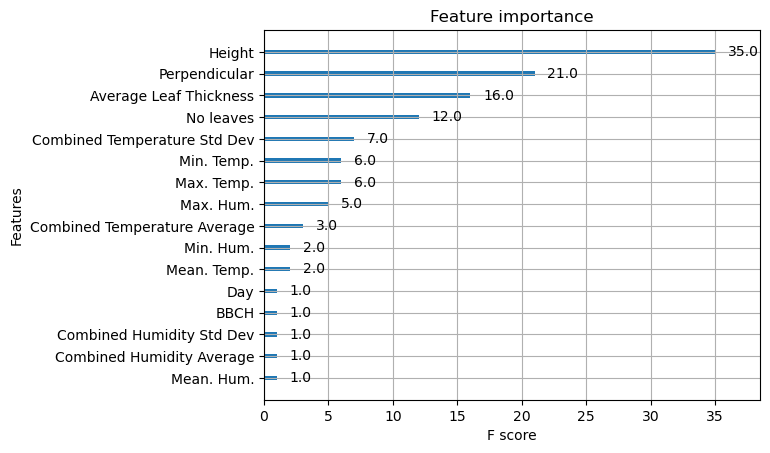

In [33]:
# Plot feature importance
xgb.plot_importance(xgb_diam)
plt.show()

In [35]:
y_xgb_train_pred = xgb_diam.predict(X_train_diam)

print(f'[TRAIN DATA]')
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train_diam, y_xgb_train_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared score
r2 = r2_score(y_train_diam, y_xgb_train_pred)
print(f'R-squared: {r2}')

[TRAIN DATA]
Mean Squared Error: 8.66673734740777
R-squared: 0.7188286021915151
